In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# nltk for text cleaning
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# wordcloud creation libraries
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [2]:
# load the true/fake news csv files into a dataframe
true_news = pd.read_csv("resources/true.csv")
fake_news = pd.read_csv("resources/fake.csv")

# Assign a numerical value to determine what is fake/true news
# 0 = true, 1 = fake
true_news["label"] = 0
fake_news["label"] = 1

In [3]:
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [4]:
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
# drop all irrelevant columns, leaving only article text & true/false indicator
true_dataset = true_news[["text", "label"]]
fake_dataset = fake_news[["text", "label"]]

# join the two dataframes & check the shape of the dataframe
dataset = pd.concat([true_dataset, fake_dataset])
dataset.shape

(44867, 2)

In [6]:
# check for any null values in the initial dataset
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
# check to see if we have a fair amount of each news type
dataset["label"].value_counts()

1    23450
0    21417
Name: label, dtype: int64

In [8]:
# shuffle the dataset to mix up the news types
dataset = dataset.sample(frac = 1)
dataset.head(20)

,text,label
6782,This why the Founding Fathers wanted separatio...,1
19924,Wow! Bravo Tomi! You really nailed it this tim...,1
20598,Karma s a bitch or is it the other way around?...,1
9944,WASHINGTON (Reuters) - Democratic presidential...,0
18502,He may not have been President Trump s biggest...,1
20510,Not that the word legal means anything to ei...,1
17101,BERLIN (Reuters) - German politicians seeking ...,0
4530,Senator Mark Kirk (R-IL) has been caught red-h...,1
22558,21st Century Wire says This is the news that t...,1
5700,(Reuters) - Lockheed Martin Corp (LMT.N) did n...,0


In [9]:
# create the values for the text cleaning
ps = WordNetLemmatizer()
stopwords = stopwords.words("english")
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jfrgr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
# Define a funtion to clean the text
def cleaning_data(row):
    
    # convert text to into lower case
    row = row.lower() 
    
    # this line of code only take words from text and remove number and special character using RegX
    row = re.sub('[^a-zA-Z]' , ' ' , row)
    
    # split the data and make token.
    token = row.split() 
    
    # lemmatise the word and remove stop words like a, an , the , is ,are ...
    news = [ps.lemmatize(word) for word in token if not word in stopwords]  
    
    # finaly join all the token with space
    cleaned_news = ' '.join(news) 
    
    # return cleanned data
    return cleaned_news 

In [11]:
# Run the function through the article text column
dataset['text'] = dataset['text'].apply(lambda x : cleaning_data(x))

In [12]:
# drop any blank rows that the lemmatiser created (more than likely articles with irrelevant content)
dataset = dataset.replace(r'^s*$', float('NaN'), regex = True)
dataset.dropna(inplace = True) 
dataset.shape

(44235, 2)

In [13]:
# export final cleaned data file to a csv
dataset.to_csv("resources/dataset.csv", index = False)
dataset.head(20)

,text,label
6782,founding father wanted separation church state...,1
19924,wow bravo tomi really nailed time enjoy notion...,1
20598,karma bitch way around la seem like hillary cl...,1
9944,washington reuters democratic presidential can...,0
18502,may president trump biggest fan primary season...,1
20510,word legal mean anything either one hillary cl...,1
17101,berlin reuters german politician seeking form ...,0
4530,senator mark kirk r il caught red handed lying...,1
22558,st century wire say news elite political estab...,1
5700,reuters lockheed martin corp lmt n turn corey ...,0


In [14]:
# Split the data into fake & true news for the wordcloud creation
fake = dataset[(dataset.label == 1)]
fake = pd.DataFrame(fake["text"])

true = dataset[(dataset.label == 0)]
true = pd.DataFrame(true["text"])

FileNotFoundError: [Errno 2] No such file or directory: 'images/fake-news.png'

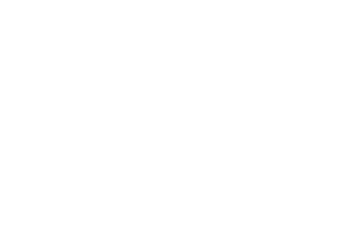

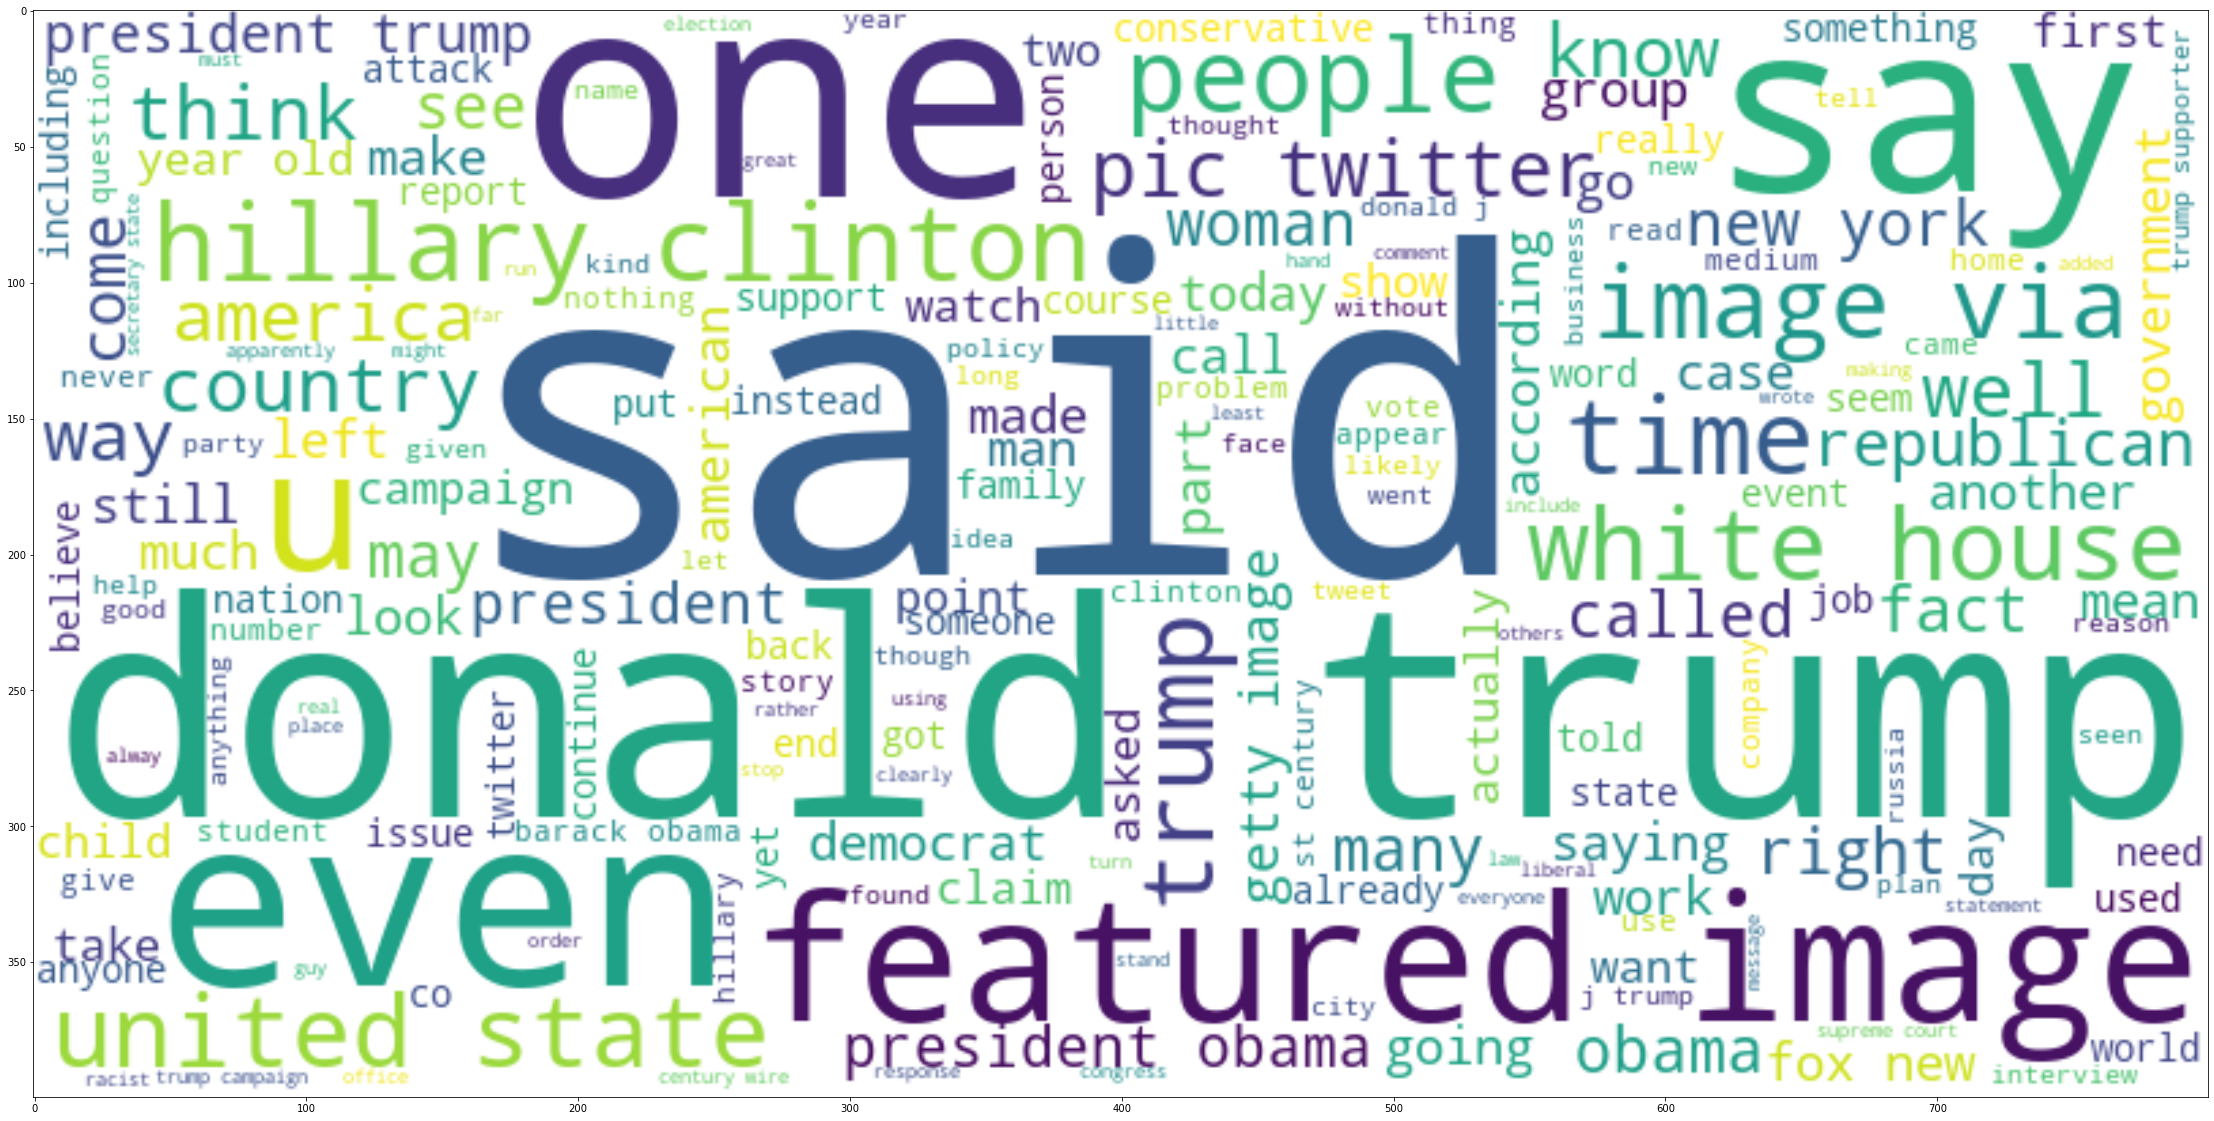

In [15]:
# Fake wordcloud
text = " ".join(review for review in fake.text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('images/fake-news.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# True wordcloud
text = " ".join(review for review in true.text.astype(str))
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig('images/true-news.png', dpi=300, bbox_inches='tight')
plt.show()